### Use Obspy to do spectrogram analysis
##### Tutorial session for REU students, 2019, MSU Computational Seismolab

### Step 1: get sample data
Get the data of the 2008 Nevada M5.8 earthquake (event time: 2008-02-21,14:16:10).
Selected stations: TA.Q20A and NM.UALR. Download all three channels (BHE,BHN,BHZ).
Use the obspy client to download data.（you just learnt)
Please download 20 minutes of data after the event occurrance time.

In [2]:
%matplotlib inline
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

client = Client("IRIS")

##### your code: （store the two stations in the same trace by using st += ...)



##### end of your code

print(st)
st.plot()


### Step2: download the instrument response file (new)
The instrument response file can be downloaded by the following commands:. Run the following command:

Inventory created at 2019-06-01T20:18:47.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.36
		    http://service.iris.edu/fdsnws/station/1/query?station=Q20A&locatio...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			TA
		Stations (1):
			TA.Q20A (Ridgley Place, Grand Junction, CO, USA)
		Channels (3):
			TA.Q20A..BHZ, TA.Q20A..BHN, TA.Q20A..BHE
Inventory created at 2019-06-01T20:18:47.979200Z
	Created by: ObsPy 1.1.0
		    https://www.obspy.org
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (2):
			NM, TA
		Stations (2):
			NM.UALR (University of Arkansas, Little Rock)
			TA.Q20A (Ridgley Place, Grand Junction, CO, USA)
		Channels (6):
			NM.UALR..BHZ, NM.UALR..BHN, NM.UALR..BHE, TA.Q20A..BHZ, 
			TA.Q20A..BHN, TA.Q20A..BHE


6 Trace(s) in Stream:
TA.Q20A..BHE | 2008-02-21T14:16:10.024998Z - 2008-02-21T14:36:09.999998Z | 40.0 Hz, 48000 samples
TA.Q20A..BHN | 2008-02-21T14:16:10.024998Z - 2008-02-21T14:36:09.999998Z | 40.0 Hz, 48000 samples
TA.Q20A..BHZ | 2008-02-21T14:16:10.000000Z - 2008-02-21T14:36:10.000000Z | 40.0 Hz, 48001 samples
NM.UALR..BHE | 2008-02-21T14:16:10.027753Z - 2008-02-21T14:36:09.977753Z | 20.0 Hz, 24000 samples
NM.UALR..BHN | 2008-02-21T14:16:10.027753Z - 2008-02-21T14:36:09.977753Z | 20.0 Hz, 24000 samples
NM.UALR..BHZ | 2008-02-21T14:16:10.027753Z - 2008-02-21T14:36:09.977753Z | 20.0 Hz, 24000 samples

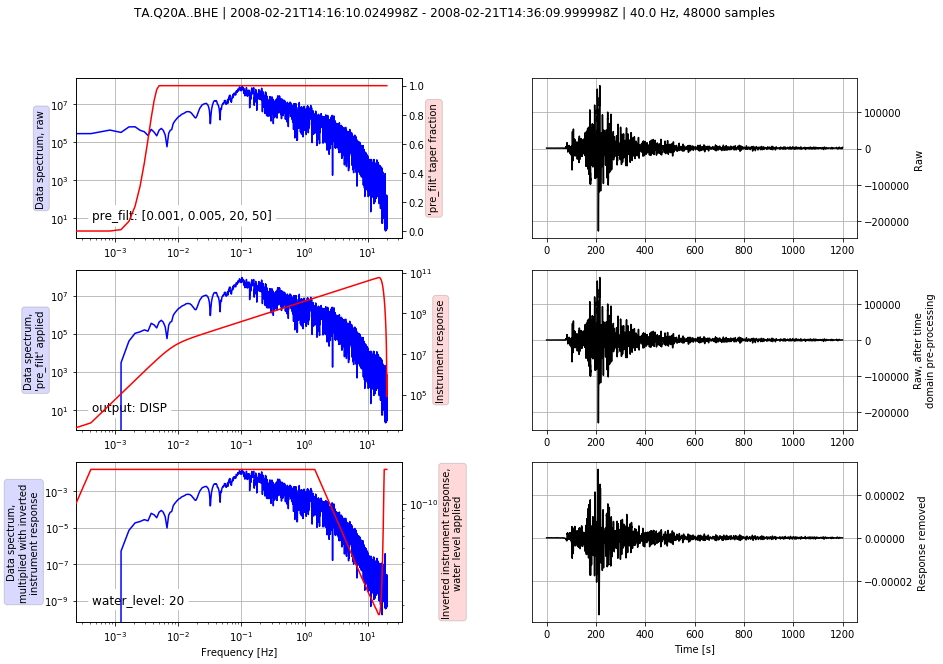

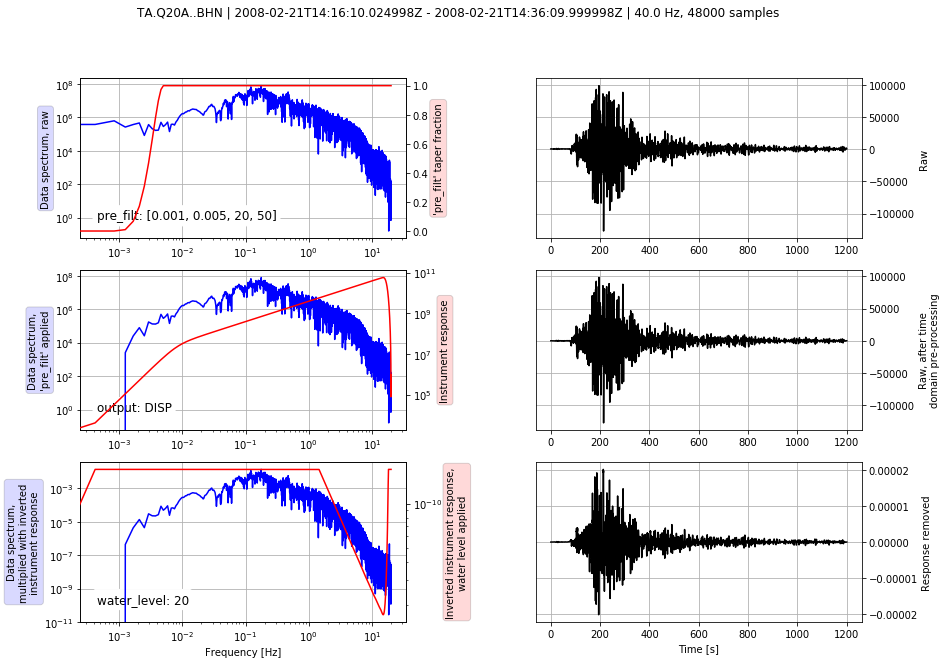

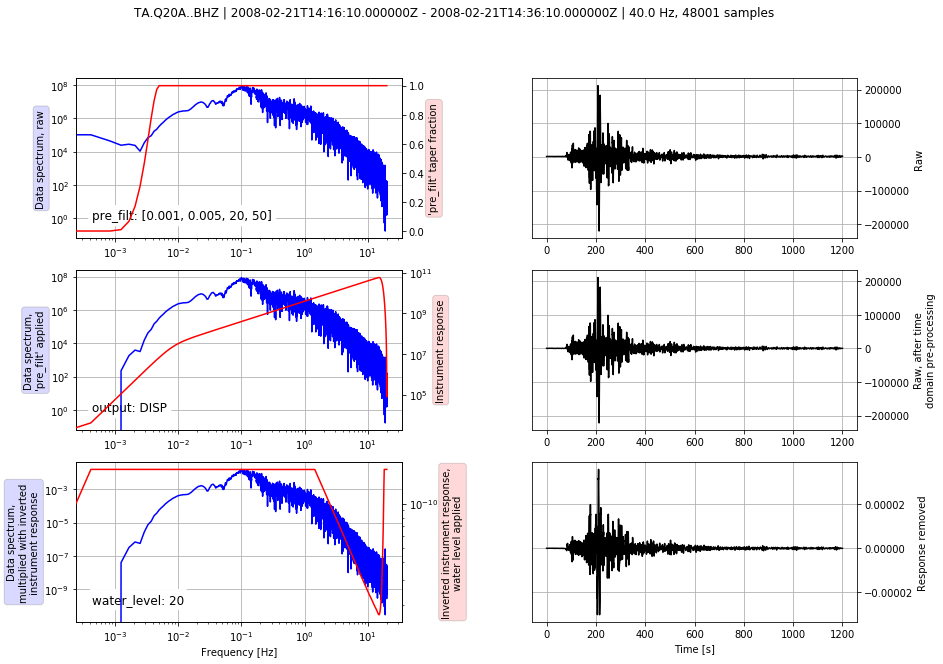

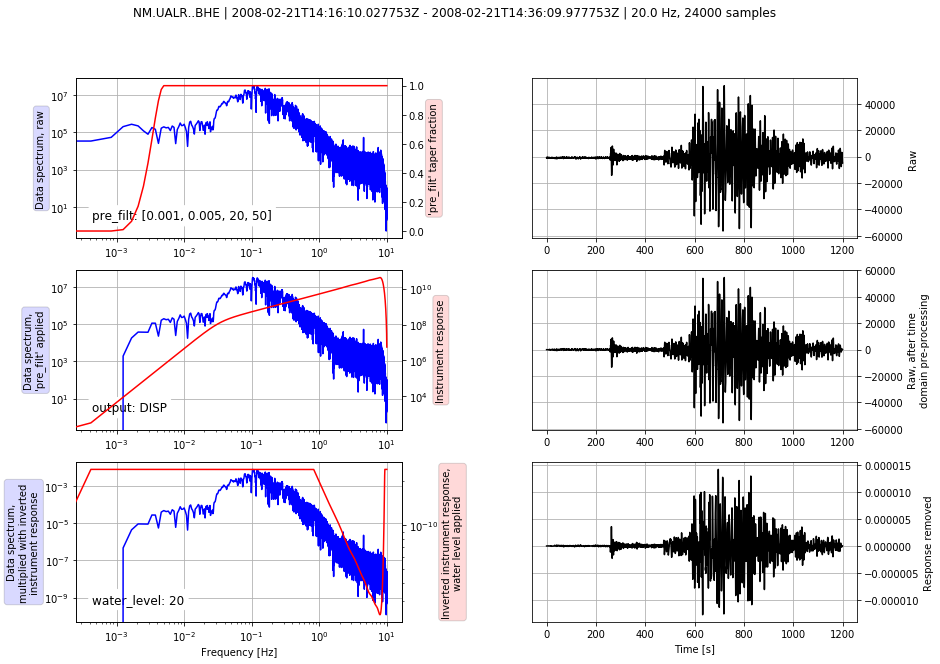

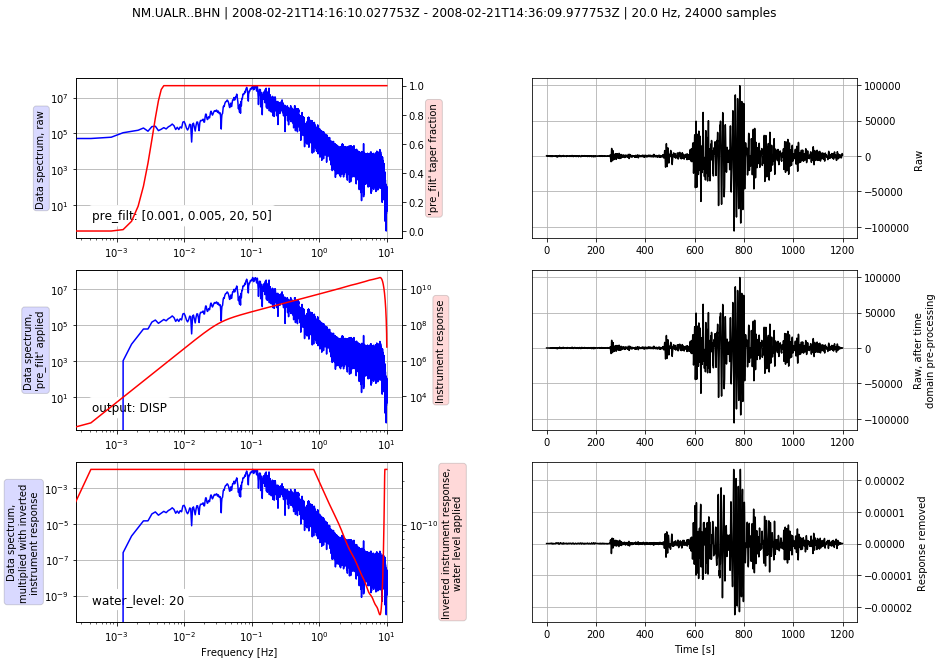

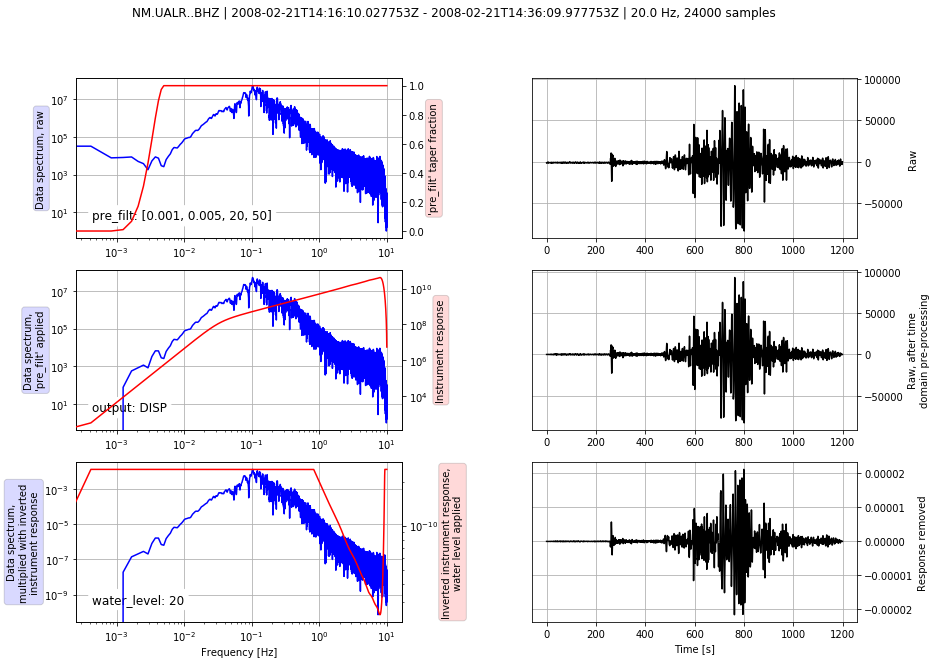

In [3]:
# starttime and endtime should be the same as the time span you downloaded in step 1
starttime = t
endtime = t + 20 * 60
inventory = client.get_stations(
     starttime=starttime, endtime=endtime,
     network="TA", sta="Q20A", loc="*", channel="BH*",
     level="response")
print(inventory)

# please download the other station NM.UALR's response file, stored in the inventory:
##### your code:



##### end of your code

# now you can remove instrument response by this command (and plot):
pre_filt = [0.001, 0.005, 20, 50]
st.remove_response(inventory=inventory, water_level=20,pre_filt=pre_filt, 
                   output="DISP",plot=True)

### step 3: Filtering
I interested in two frequency ranges: 10 - 40 s, and 20 - 80 s.

For 10 - 40 s I will **pick arrival time**

For 20 - 80 s I will **do waveform comparison**

please filter the trace for me.

(Hint: consider use how many passes, which is defined as "zeropass" in obspy). More hints are on the official document: https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.filter.html

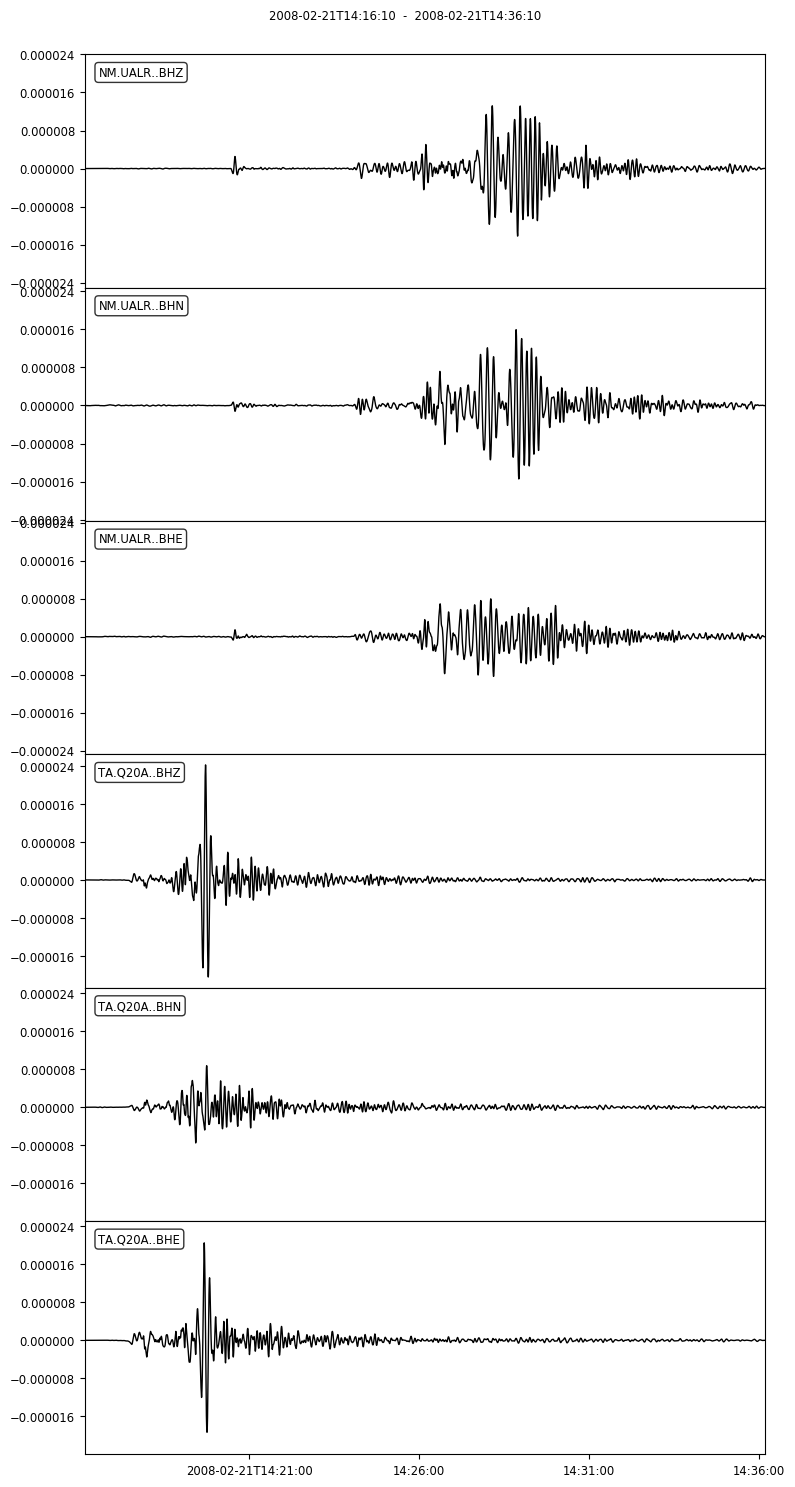

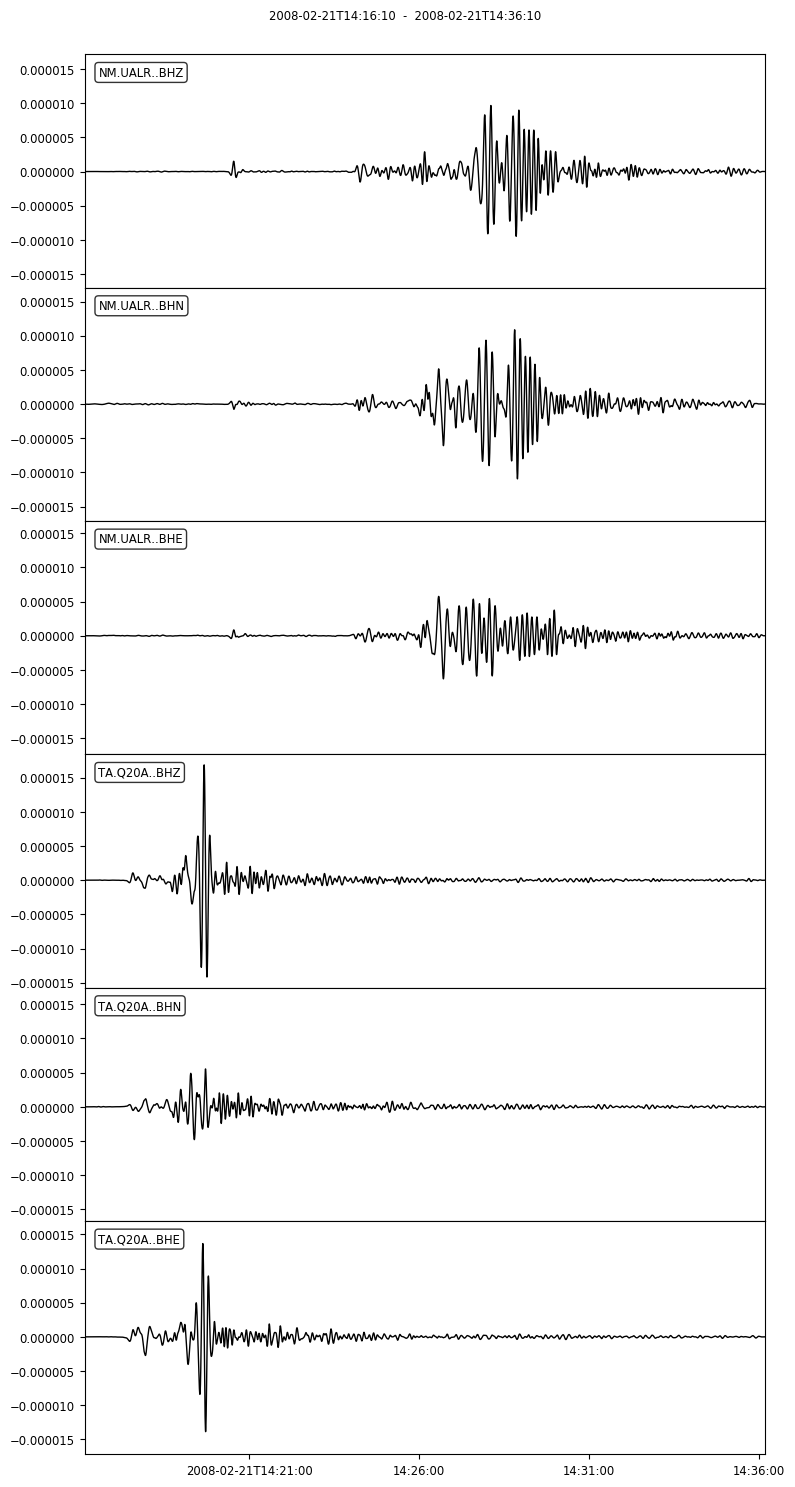

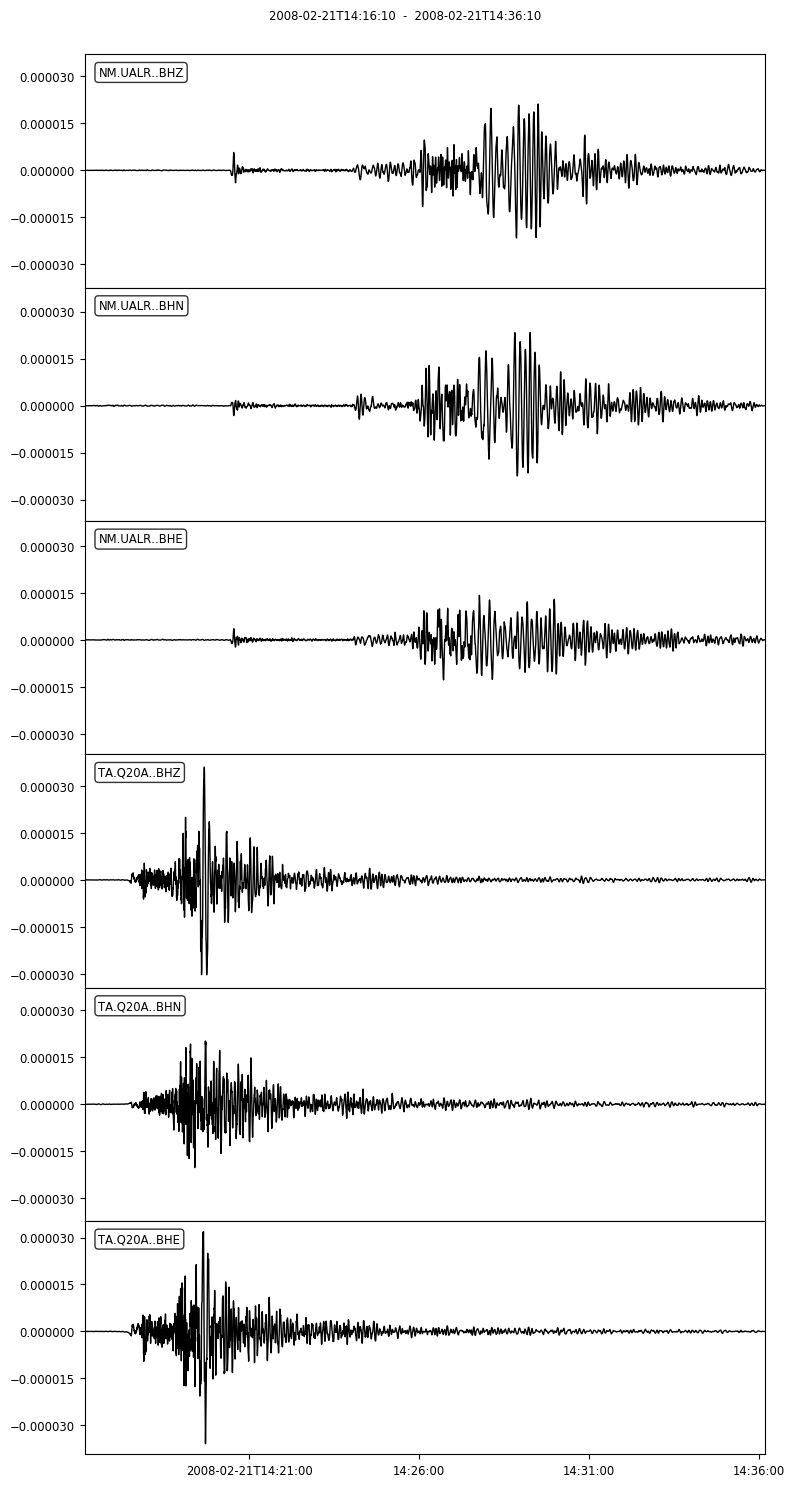

In [4]:
# I will do an example for you: Low-pass filter 10 Hz with zerophase on and off:
st2_1 = st.copy() # create a new stream data to avoid interfercing the original data
st2_1.filter('lowpass',freq=1/10,corners=2,zerophase=False)
st2_2 = st.copy()
st2_2.filter('lowpass',freq=1/10,corners=2,zerophase=True)
# compare the filtered data 
st2_1.plot()
st2_2.plot()
st.plot()
# please compare the data and recall what you have learnt in the signal_processing session

In [6]:
# now it's your time to do the filtering
##### your code (using st_flt1 for 10-40 s and st_flt2 for 20-80 s), and then plot



##### end of your code

st_flt2.plot()

### Step 4: Cut the window 
I will cut the time window for you.

In [7]:
# cut time window
# slice(t_start,t_end), in UTCdateTime
t = UTCDateTime("2008-02-21T14:16:10")  # Nevada
Q20A = st_flt1[0:3].copy()
UALR = st_flt1[3:6].copy()
Q20A_pnl = Q20A.copy().slice(t+50,t+140)
Q20A_sf = Q20A.copy().slice(t+150,t+300)
UALR_p = UALR.copy()
UALR_p = UALR_p.slice(t+240,t+320)
UALR_s = UALR.copy().slice(t+7.5*60,t+9*60)
UALR_sf = UALR.copy().slice(t+10*60,t+15*60)
UALR_p.plot()

### Step5: Spectrum
Use UALR_p, UALR_s, UALR_sf

Use np.fft

Text(0,0.5,'amplitude spectrum')

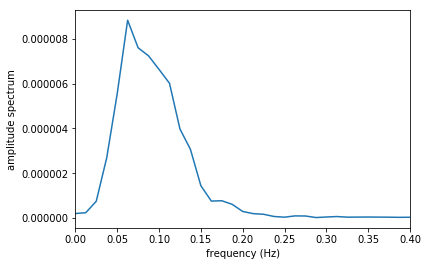

In [8]:
# example: using the Z component
import numpy as np
import matplotlib.pyplot as plt

data = UALR_p[2].data
dt = UALR_p[2].stats.delta
spec = np.fft.fft(data) * dt
freq = np.linspace(0,1/dt,len(spec))
plt.figure()
plt.plot(freq,np.abs(spec))
plt.xlim([0,0.4])
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude spectrum')

In [ ]:
# now please plot the spectrum of UALR_s and UALR_sf (Z component, 2nd dimension):
##### your code:



##### end of your code

# you can also play with the spectrum

### Step6: Spectrogram
Use obspy to calculate the spectrogram of the waveform.

Example is to plot UALR's vertical component

Key parameters: 

per_lap: lap percentage of adjencent windows

wlen: window length

To know more about spectrogram, read wiki:

https://en.wikipedia.org/wiki/Spectrogram

Also read something about short-time Fourier transform:

https://en.wikipedia.org/wiki/Short-time_Fourier_transform

and time-frequency analysis:

https://link.springer.com/chapter/10.1007/978-981-10-2534-1_7





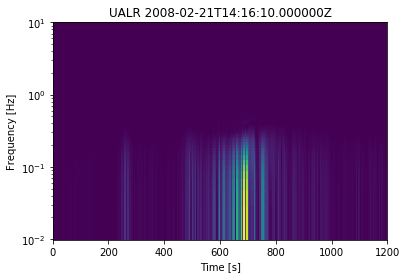

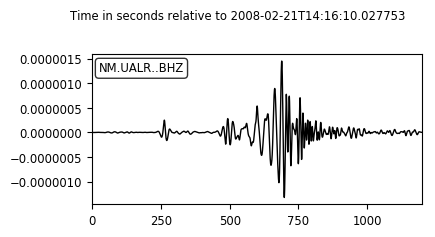

In [13]:
## Example of spectrogram
st_flt2[5].spectrogram(per_lap=0.2,wlen=5,log=True, title='UALR ' + str(st_flt1[2].stats.starttime))
st_flt2[5].plot(size=(450,250),type='relative',number_of_ticks=6)

In [ ]:
# Please plot the spectrogram of the Q20A (Z compont, 2nd trace in the stream):
##### Your code:


##### end of your code
# you should be able to obtain a spectrum diagram like that.
# be sure to modify the parameters per_lap and wlen